# Credit Card Approval Prediction
---
A Credit Card Dataset for Machine Learning

### Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

### Content & Explanation
There're two tables could be merged by ID:

#### application_record.csv		
* __ID__ : Client number	
* __CODE_GENDER__ :	Gender	
* __FLAG_OWN_CAR__ :	Is there a car	
* __FLAG_OWN_REALTY__ :	Is there a property	
* __CNT_CHILDREN__ :	Number of children	
* __AMT_INCOME_TOTAL__ :	Annual income	
* __NAME_INCOME_TYPE__ :	Income category	
* __NAME_EDUCATION_TYPE__ :	Education level	
* __NAME_FAMILY_STATUS__ :	Marital status	
* __NAME_HOUSING_TYPE__ :	Way of living	
* __DAYS_BIRTH__ :	Birthday	Count backwards from current day (0), -1 means yesterday
* __DAYS_EMPLOYED__ :	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
* __FLAG_MOBIL__ :	Is there a mobile phone	
* __FLAG_WORK_PHONE__ :	Is there a work phone	
* __FLAG_PHONE__ :	Is there a phone	
* __FLAG_EMAIL__ :	Is there an email	
* __OCCUPATION_TYPE__ :	Occupation	
* __CNT_FAM_MEMBERS__ :	Family size	
#### credit_record.csv		
* __ID__ :	Client number	
* __MONTHS_BALANCE__ :	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* __STATUS__ :	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Assigning working directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/Credit_card_approval_prediction/')

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.max_colwidth
pd.set_option('max_colwidth', None)

# Importing dataset

In [4]:
app_record = pd.read_csv('Datasets/application_record.csv')
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app_record.shape

(438557, 18)

In [9]:
credit_record = pd.read_csv('Datasets/credit_record.csv')
credit_record.head(15)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [7]:
credit_record.shape

(1048575, 3)

In [13]:
desc = pd.read_csv('Datasets/desc.csv')
desc.index = desc['Feature name']
desc.drop('Feature name', axis=1, inplace=True)
desc = desc.T
desc.head()

Feature name,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,cr_ID,cr_MONTHS_BALANCE,cr_STATUS
Explanation,Client number,Gender,Is there a car,Is there a property,Number of children,Annual income,Income category,Education level,Marital status,Way of living,...,Start date of employment: (Count backwards fro...,Is there a mobile phone,Is there a work phone,Is there a phone,Is there an email,Occupation,Family size,Client number,Record month: (The month of the extracted data...,Status: (0: 1-29 days past due 1: 30-59 days p...


# Understanding the data

In [21]:
app_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [22]:
credit_record.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [23]:
# There are two tables: 'app_record' and 'credit_record', with a common column 'ID'.

In [24]:
len(app_record.columns)

18

In [25]:
len(credit_record.columns)

3

In [26]:
# The app_record table contains 18 attributes and the credit_record column contains 3 attributes

In [27]:
### Lets see what is the target variable ###

desc['cr_STATUS']

Explanation    Status: (0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month)
Name: cr_STATUS, dtype: object

In [28]:
desc['cr_MONTHS_BALANCE']

Explanation    Record month: (The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on)
Name: cr_MONTHS_BALANCE, dtype: object

In [32]:
credit_record.head(15)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [34]:
credit_record['MONTHS_BALANCE'].min()

-60

<AxesSubplot:>

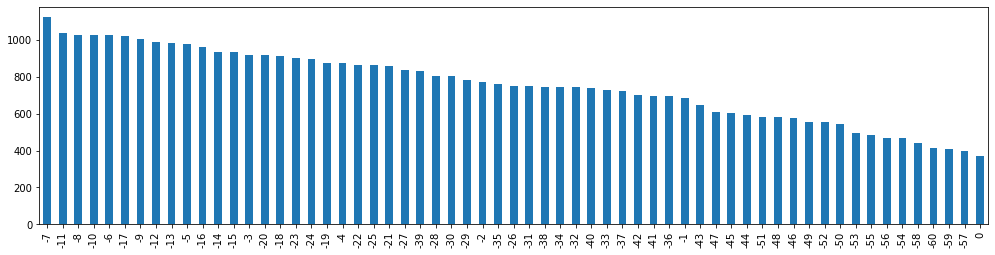

In [45]:
plt.figure(figsize=(17,4))
credit_record.groupby('ID').min()['MONTHS_BALANCE'].sort_values(ascending=True).value_counts().plot(kind='bar')